# Logistic Regression on Mobile Price Range Prediction Dataset

[Dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/mobilePricePred.csv)

[EDA on dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Python Notebooks/Mobile Price Range Prediction.ipynb)

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix,PrecisionRecallCurve

from imblearn.over_sampling import SMOTE

In [3]:
mobile = pd.read_csv('../../Lab1/Heenal/Data/mobilePricePred.csv')

In [4]:
mobile.shape

(2000, 21)

In [5]:
# Selecting all the features

#X = mobile[['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'mobile_wt','blue', 'fc', 'sc_h', 'talk_time']].values
X = mobile.drop(['price_range'], axis =1).values

In [6]:
X.shape

(2000, 20)

In [7]:
y = mobile['price_range'].values

In [8]:
y.shape

(2000,)

In [9]:
# Splitting the data into TRAIN and TEST sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


('Number transactions X_train dataset: ', (1400, 20))
('Number transactions y_train dataset: ', (1400,))
('Number transactions X_test dataset: ', (600, 20))
('Number transactions y_test dataset: ', (600,))


## Visualizing the range of values of the features selected

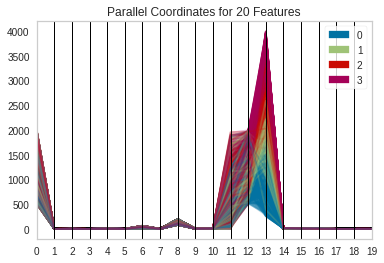

In [11]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.poof()

### The range of values is too varied and hence, the features should be scaled or normalized.

In [12]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
X_train_std.shape

(1400, 20)

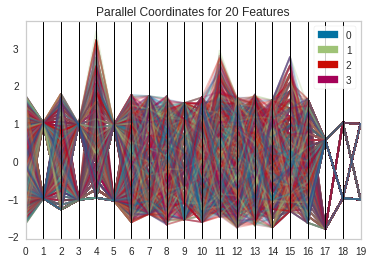

In [14]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X_train_std, y)
visualizer.poof()

In [15]:
# Using the Logistic Regression as the model

lr = LogisticRegression(C=0.0001, random_state=0)
lr.fit(X_train_std, y_train)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [16]:
knn = KNeighborsClassifier(n_neighbors=20, n_jobs=4)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=20, p=2,
           weights='uniform')

# Plotting the learning curve using sklearn

In [17]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

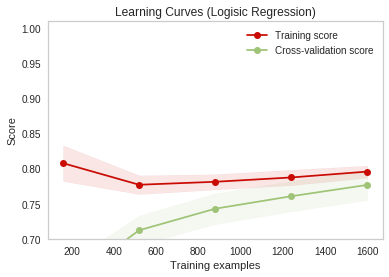

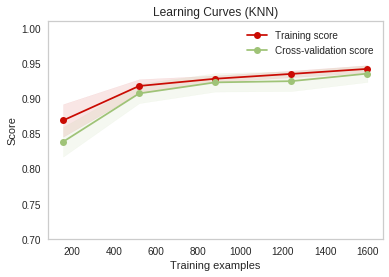

In [18]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

# Plotting for KNearestNeighbours
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

# Checking out all the metrics

## Plotting the confusion matrix selecting different features
```
This would help us to analyse which features properly identify the distinctions rather borders between the 4 classes.
```

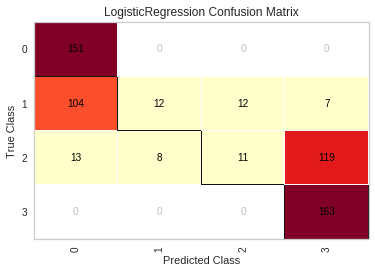

In [32]:
# Features = battery and RAM
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

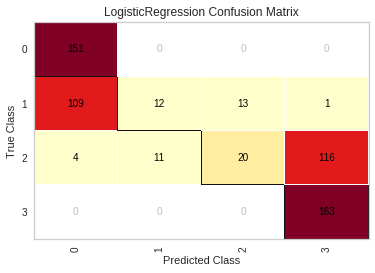

In [71]:
# Features = battery, ram,pxwidth
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

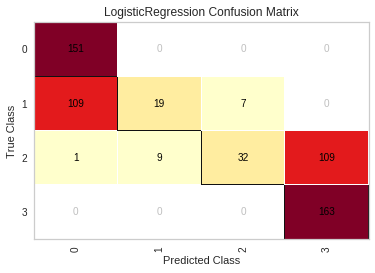

In [82]:
\# Features = battery, ram,pxwidth, pxheight
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

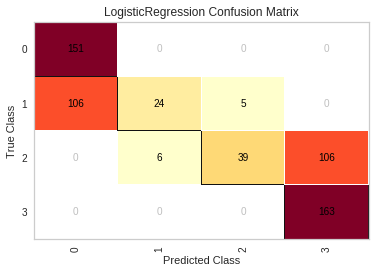

In [93]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

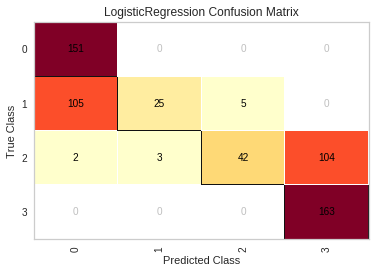

In [103]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw, pc
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

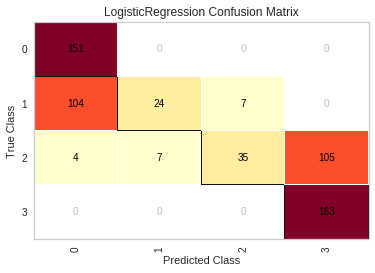

In [112]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw, pc, touch_screen
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

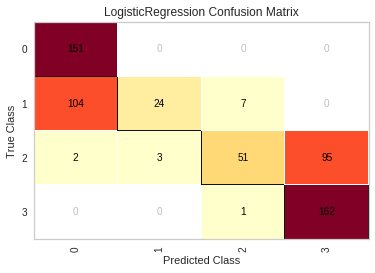

In [122]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw, pc, mobilewt, blue
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

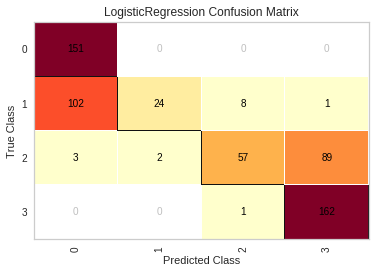

In [132]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw, pc, mobilewt, blue, fc,sch
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

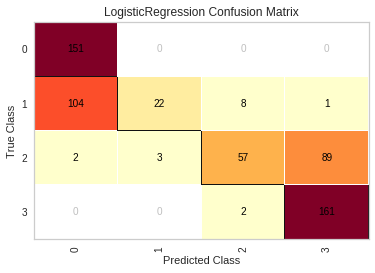

In [153]:
# Features = battery, ram,pxwidth, pxheight, int memory, scw, pc, mobilewt, blue, fc,sch,talktime
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

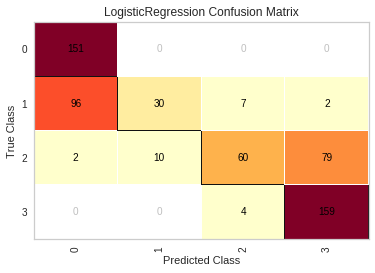

In [168]:
# Features = all
cm = ConfusionMatrix(lr, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

## Observation : 
```
Logistic regression does not properly differentiate between the classes '1' and '0' , and '2' and '3'
```

## Hence, trying out KNN with different number of neighbours

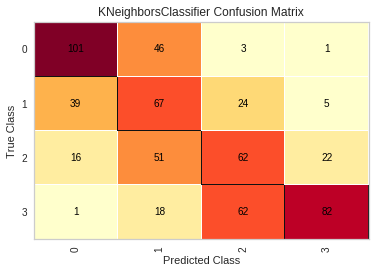

In [181]:
# Features = all 
# No_neighbours = 5
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

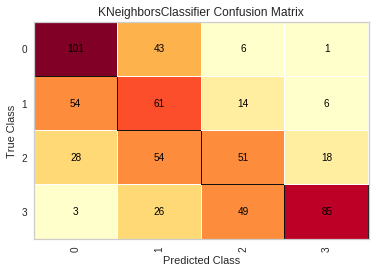

In [197]:
# Features = all 
# No_neighbours = 3
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

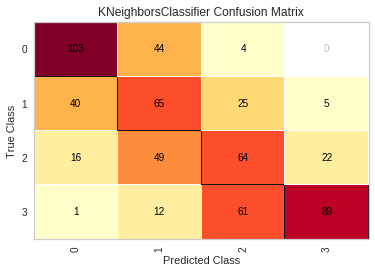

In [195]:
# Features = all 
# No_neighbours = 7
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

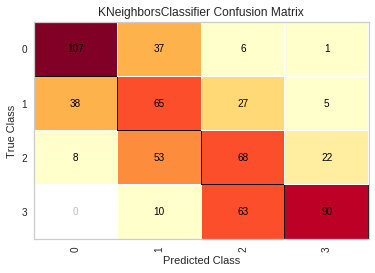

In [199]:
# Features = all 
# No_neighbours = 10
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

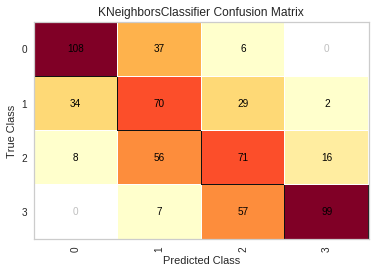

In [201]:
# Features = all 
# No_neighbours = 15
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

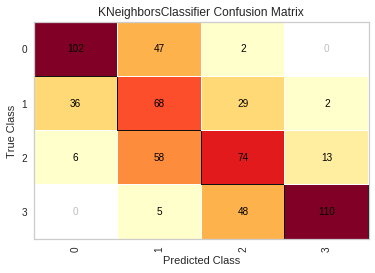

In [203]:
## Features = all 
# No_neighbours = 20
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

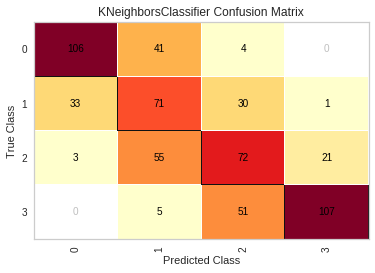

In [205]:
# Features = all 
# No_neighbours = 25
cm = ConfusionMatrix(knn, classes=[0,1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

## Observation :
```
1. KNN classifies the 4 classes a little better than simple logistic regression.
2. Better distinctions are observed on increasing the number of neighbours, though there are subtle differences   after 20 neighbours. 
```

In [19]:
knn.score(X_test_std, y_test)

0.59

In [26]:
y_pred = knn.predict(X_test_std)
y_pred

array([3, 0, 2, 1, 1, 0, 0, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 2, 1, 0, 1, 0,
       3, 2, 2, 1, 3, 2, 2, 2, 1, 0, 1, 0, 1, 3, 1, 1, 3, 3, 3, 0, 3, 1,
       1, 3, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 2, 1, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1,
       2, 3, 1, 2, 1, 0, 2, 3, 3, 3, 0, 3, 0, 2, 2, 1, 3, 2, 3, 2, 2, 3,
       2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 1, 2, 0, 2, 0, 1, 0, 3, 1, 3,
       2, 3, 3, 3, 2, 1, 1, 1, 2, 3, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0,
       3, 1, 0, 3, 1, 2, 2, 0, 2, 2, 1, 3, 3, 3, 1, 0, 3, 1, 0, 3, 3, 1,
       2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 3, 0, 0, 2,
       2, 0, 3, 3, 3, 1, 2, 2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       2, 3, 0, 0, 2, 3, 2, 2, 1, 1, 1, 1, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2,
       2, 3, 1, 0, 1, 3, 3, 1, 3, 0, 3, 1, 0, 0, 1, 3, 2, 1, 0, 1, 1, 2,
       3, 2, 1, 2, 1, 1, 1, 2, 3, 3, 1, 3, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 3, 0, 3, 1, 3, 0, 1, 0, 1,

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.59

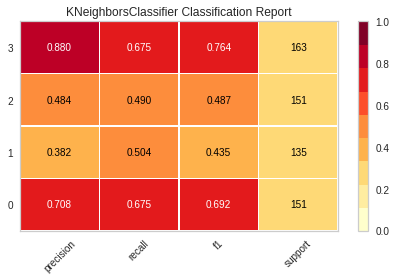

In [29]:
# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(knn, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()